In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = None


In [2]:
# Parameters
product = {"nb": "/home/jerem/intention1.0/output/sprint1_meta_limen.ipynb"}


# Sprint 1 – MetaLIMEN Foundations

In this notebook we complete Sprint 1 by preparing conceptual data, training a MetaLIMEN model stub, defining intentions, and visualizing the meta-intention space.

## 1. Prepare Conceptual Data

In [3]:
%%bash
python scripts/prepare_conceptual_data.py \
  --config configs/meta_limen_config.yaml \
  --output_dir data/conceptual_corpus

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:  25%|██▌       | 1/4 [00:00<00:01,  2.00it/s]

Loading checkpoint shards:  50%|█████     | 2/4 [00:00<00:00,  2.02it/s]

Loading checkpoint shards:  75%|███████▌  | 3/4 [00:01<00:00,  2.03it/s]

Loading checkpoint shards: 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

Loading checkpoint shards: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


Prepared 6 concept entries in data/conceptual_corpus/concepts.jsonl


Inspect output:

In [4]:
import json
with open("data/conceptual_corpus/concepts.jsonl") as f:
    lines = f.readlines()
print(f"Prepared {len(lines)} concept entries")
sample = json.loads(lines[0])
sample

Prepared 6 concept entries


{'domain': 'quantum_computing',
 'description': 'design and analysis of algorithms on quantum machines',
 'vector': [-0.003464670153334737,
  -0.0035296042915433645,
  -0.0038434669841080904,
  0.0036289298441261053,
  0.00043769777403213084,
  -0.0006102886400185525,
  -0.0002858368097804487,
  0.0011909814784303308,
  -0.05166953429579735,
  -0.0075220987200737,
  -7.643861317774281e-05,
  -0.0033774778712540865,
  0.001617481466382742,
  -0.0006307316944003105,
  -0.003855812130495906,
  0.0014813971938565373,
  -0.0014026944991201162,
  -0.0062763886526227,
  -0.002644256455823779,
  0.0009433225495740771,
  -0.010628847405314445,
  -0.001993384677916765,
  -0.003424095455557108,
  0.004097849130630493,
  -0.001864645048044622,
  0.003496688324958086,
  -0.0029071697499603033,
  0.005233489442616701,
  0.005790533032268286,
  -0.0020307954400777817,
  0.002277268096804619,
  -0.0038006119430065155,
  0.001385367359034717,
  0.0015200964407995343,
  0.001075898064300418,
  -0.001032

## 2. Instantiate MetaLIMEN & Define Intentions

In [5]:
from modules.meta_limen.meta_limen import MetaLIMEN
import pandas as pd
import yaml

cfg_file = "configs/meta_limen_config.yaml"
ml = MetaLIMEN(cfg_file)
cfg = yaml.safe_load(open(cfg_file))
domains = [d["name"] for d in cfg["target_domains"]]
intents = ml.define_learning_intentions()
df = pd.DataFrame(intents)
df[["domain","learning_priority","curriculum_weight","meta_position"]]

/home/jerem/intention1.0/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading checkpoint shards:   0%|                                         | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:  25%|████████▎                        | 1/4 [00:00<00:01,  1.98it/s]

Loading checkpoint shards:  50%|████████████████▌                | 2/4 [00:00<00:00,  2.02it/s]

Loading checkpoint shards:  75%|████████████████████████▊        | 3/4 [00:01<00:00,  2.04it/s]

Loading checkpoint shards: 100%|█████████████████████████████████| 4/4 [00:01<00:00,  2.38it/s]

Loading checkpoint shards: 100%|█████████████████████████████████| 4/4 [00:01<00:00,  2.23it/s]

,domain,learning_priority,curriculum_weight,meta_position
0,quantum_computing,0.85,0.25,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,synthetic_biology,0.75,0.15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,behavioral_economics,0.70,0.15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,cognitive_neuroscience,0.80,0.20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,climate_modeling,0.65,0.10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,complex_adaptive_systems,0.60,0.15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## 3. Visualize Meta-Intention Space

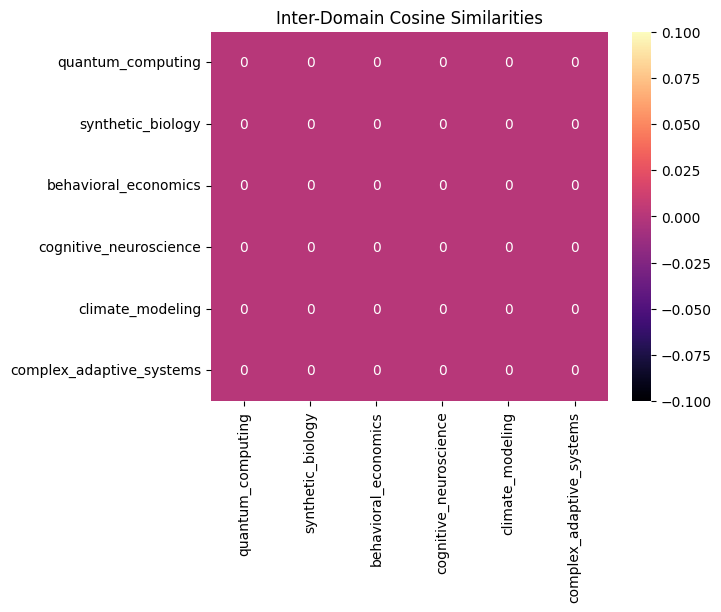

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vectors = np.vstack([i["meta_position"] for i in intents])
sim = cosine_similarity(vectors)
sns.heatmap(sim, xticklabels=df.domain, yticklabels=df.domain, cmap="magma", annot=True)
plt.title("Inter-Domain Cosine Similarities")
plt.show()

## 4. Run Unit Tests

In [7]:
%%bash
pytest tests/unit/test_meta_limen.py -q || true


==================================== ERRORS ====================================
_________

_______ ERROR collecting tests/unit/test_meta_limen.py ________________
ImportError while i

mporting test module '/home/jerem/intention1.0/tests/unit/test_meta_limen.py'.
Hint: make sure your 

test modules/packages have valid Python names.
Traceback:
/usr/lib/python3.12/importlib/__i

nit__.py:90: in import_module
    return _bootstrap._gcd_import(name[level:]

, package, level)
tests/unit/test_meta_limen.py:4: in <module>
    

from modules.met

a_limen.meta_limen import

 MetaLIMEN
E   ModuleNotFoundError: No module named 'modules'


=========================== short test summary info ============================


ERROR tests/unit/test_meta_limen.py
!!!!!!!!!!!!!!!!!!!! Interrupted: 1 error during collect

ion !!!!!!!!!!!!!!!!!!!!
1 error in 0.06s
